## 2.3 Coordinate Systems

Coordinate systems are defined using an origin point and a set of axes. 

### Point vs Coordinate what's the difference?
A point defined a specific position in space regardless of the coodinate system. A point will not move if we change the coordinate system, but rather the coordinates will change.

The coordinate of a perticular point depend on where the origin of the coordinate system lies and also on the axis of the system, but the position of the points are independent of this.

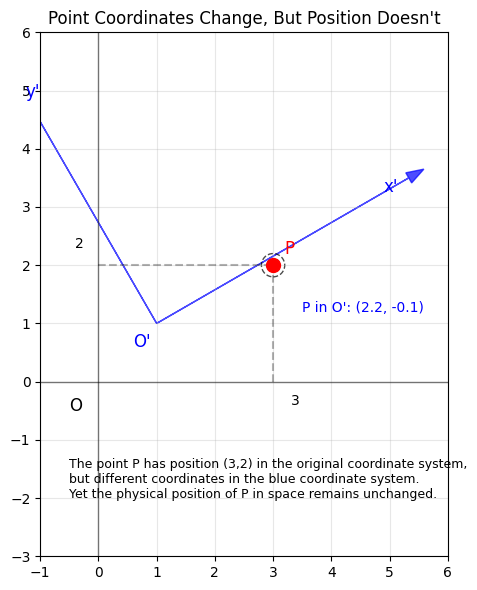

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Original coordinate system - drawn in black
origin_x, origin_y = 0, 0
ax.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax.text(-0.5, -0.5, "O", fontsize=12)

# Point P remains at the same physical location regardless of coordinate system
point_x, point_y = 3, 2
ax.scatter(point_x, point_y, color='red', s=100, zorder=5)
ax.text(point_x+0.2, point_y+0.2, "P", fontsize=12, color='red')

# New coordinate system - drawn in blue
# Translation and rotation of coordinate system
new_origin_x, new_origin_y = 1, 1
rotation_angle = 30  # degrees

# Draw new coordinate system axes
rotation_rad = np.deg2rad(rotation_angle)
x_axis_length, y_axis_length = 5, 5

# New x-axis
ax.arrow(new_origin_x, new_origin_y, 
         x_axis_length * np.cos(rotation_rad), 
         x_axis_length * np.sin(rotation_rad),
         head_width=0.2, head_length=0.3, fc='blue', ec='blue', alpha=0.7)
ax.text(new_origin_x + 4.5*np.cos(rotation_rad), 
        new_origin_y + 4.5*np.sin(rotation_rad), 
        "x'", fontsize=12, color='blue')

# New y-axis
ax.arrow(new_origin_x, new_origin_y, 
         y_axis_length * np.cos(rotation_rad + np.pi/2), 
         y_axis_length * np.sin(rotation_rad + np.pi/2),
         head_width=0.2, head_length=0.3, fc='blue', ec='blue', alpha=0.7)
ax.text(new_origin_x + 4.5*np.cos(rotation_rad + np.pi/2), 
        new_origin_y + 4.5*np.sin(rotation_rad + np.pi/2), 
        "y'", fontsize=12, color='blue')

ax.text(new_origin_x-0.4, new_origin_y-0.4, "O'", fontsize=12, color='blue')

# Calculate the coordinates of P in the new coordinate system
# First translate relative to new origin
rel_x = point_x - new_origin_x
rel_y = point_y - new_origin_y
# Then rotate to align with new coordinate system
new_x = rel_x * np.cos(-rotation_rad) - rel_y * np.sin(-rotation_rad)
new_y = rel_x * np.sin(-rotation_rad) + rel_y * np.cos(-rotation_rad)

# Add circle to emphasize the point location is unchanged
circle = Circle((point_x, point_y), 0.2, fill=False, linestyle='--', alpha=0.7)
ax.add_patch(circle)

# Add coordinate values for original system
ax.text(point_x+0.3, -0.4, f"{point_x}", fontsize=10, color='black')
ax.text(-0.4, point_y+0.3, f"{point_y}", fontsize=10, color='black')
ax.plot([point_x, point_x], [0, point_y], 'k--', alpha=0.3)
ax.plot([0, point_x], [point_y, point_y], 'k--', alpha=0.3)

# Add coordinate values for new system (as text)
ax.text(point_x+0.5, point_y-0.8, f"P in O': ({new_x:.1f}, {new_y:.1f})", fontsize=10, color='blue')

# Add title and explanation
ax.set_title("Point Coordinates Change, But Position Doesn't", fontsize=12)
explanation = """The point P has position (3,2) in the original coordinate system,
but different coordinates in the blue coordinate system.
Yet the physical position of P in space remains unchanged."""
ax.text(-0.5, -2, explanation, fontsize=9)

# Set equal aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(-1, 6)
ax.set_ylim(-3, 6)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Formal Definition of a Coordinate System

Let $S$ be a space (such as $\mathbb{R}^n$ or an affine space). A coordinate system on $S$ consists of:

1. An origin point $O \in S$ (in affine spaces)
2. A set of $n$ linearly independent basis vectors $\{\vec{e}_1, \vec{e}_2, \ldots, \vec{e}_n\}$
3. A bijective mapping $\Phi: S \rightarrow \mathbb{R}^n$ that assigns to each point $P \in S$ an ordered $n$-tuple $(x_1, x_2, \ldots, x_n) \in \mathbb{R}^n$ such that:

$$P = O + x_1\vec{e}_1 + x_2\vec{e}_2 + \cdots + x_n\vec{e}_n$$

The numbers $(x_1, x_2, \ldots, x_n)$ are called the coordinates of point $P$ in this coordinate system.

## Properties

- **Uniqueness**: Each point in the space corresponds to exactly one set of coordinates, and each valid set of coordinates corresponds to exactly one point.
- **Transformation**: Different coordinate systems can represent the same space, with transformation functions mapping between coordinate representations.
- **Invariance**: While coordinates change under different coordinate systems, the geometric properties of the objects remain invariant.

## Euclidean Coordinates

In our sphere modeling work, we're primarily using the standard Euclidean coordinate system in $\mathbb{R}^3$, where:
- Origin point: $(0,0,0)$
- Basis vectors: $\vec{e}_1 = (1,0,0)$, $\vec{e}_2 = (0,1,0)$, $\vec{e}_3 = (0,0,1)$
- Coordinates: $(x,y,z)$ representing positions in 3D space

This allows you to express the sphere equation as $(x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2 = r^2$ and perform the transformations between implicit and explicit forms that we've been working with.

# Finding Angles Between Vectors

## Key Formula
The angle between two vectors $\vec{v_1}$ and $\vec{v_2}$ can be calculated using the dot product:

$$\cos(\theta) = \frac{\vec{v_1} \cdot \vec{v_2}}{|\vec{v_1}||\vec{v_2}|}$$

Where:
- $\vec{v_1} \cdot \vec{v_2}$ is the dot product
- $|\vec{v_1}|$ and $|\vec{v_2}|$ are the magnitudes (lengths) of the vectors
- $\theta$ is the angle between them

## Step-by-Step Method

### Step 1: Calculate the dot product
$\vec{v_1} \cdot \vec{v_2} = v_{1x} \times v_{2x} + v_{1y} \times v_{2y} + \ldots$

### Step 2: Calculate the magnitudes of both vectors
$|\vec{v_1}| = \sqrt{v_{1x}^2 + v_{1y}^2 + \ldots}$
$|\vec{v_2}| = \sqrt{v_{2x}^2 + v_{2y}^2 + \ldots}$

### Step 3: Apply the formula to find the cosine of the angle
$\cos(\theta) = \frac{\vec{v_1} \cdot \vec{v_2}}{|\vec{v_1}||\vec{v_2}|}$

### Step 4: Find the angle using inverse cosine
$\theta = \cos^{-1}\left(\frac{\vec{v_1} \cdot \vec{v_2}}{|\vec{v_1}||\vec{v_2}|}\right)$

### Example Solution
Given $\vec{v_1} = (3, -1)$ and $\vec{v_2} = (2, 1)$ in $\mathbb{R}^2$:

### Step 1: Calculate the dot product
$\vec{v_1} \cdot \vec{v_2} = 3 \times 2 + (-1) \times 1 = 6 - 1 = 5$

### Step 2: Calculate the magnitudes
$|\vec{v_1}| = \sqrt{3^2 + (-1)^2} = \sqrt{9 + 1} = \sqrt{10}$
$|\vec{v_2}| = \sqrt{2^2 + 1^2} = \sqrt{4 + 1} = \sqrt{5}$

### Step 3: Calculate the cosine of the angle
$\cos(\theta) = \frac{5}{\sqrt{10} \times \sqrt{5}} = \frac{5}{\sqrt{50}} = \frac{5}{\sqrt{25 \times 2}} = \frac{5}{5\sqrt{2}} = \frac{1}{\sqrt{2}}$

### Step 4: Find the angle using inverse cosine
$\theta = \cos^{-1}\left(\frac{1}{\sqrt{2}}\right) = \cos^{-1}\left(\frac{\sqrt{2}}{2}\right) \approx 45°$

Therefore, the angle between vectors $\vec{v_1} = (3, -1)$ and $\vec{v_2} = (2, 1)$ is approximately 45 degrees.

#### Affine Combinations

#### Definition
An **affine combination** of points $\{p_1, p_2, ..., p_n\}$ is a weighted sum:

$$p = \sum_{i=1}^{n} \alpha_i p_i$$

where the weights $\alpha_i$ satisfy the constraint:

$$\sum_{i=1}^{n} \alpha_i = 1$$

#### Key Properties

- Preserves straight lines and parallelism
- Not affected by choice of coordinate system
- Invariant under affine transformations

#### Simple Examples

- **Midpoint**: $p = 0.5p_1 + 0.5p_2$ (weights sum to 1)
- **Line segment**: $p = (1-t)p_1 + tp_2$ where $0 \leq t \leq 1$ 
- **Triangle centroid**: $p = \frac{1}{3}p_1 + \frac{1}{3}p_2 + \frac{1}{3}p_3$

#### Implications for Graphics

- Forms the basis for interpolation between points
- Enables representation of curves and surfaces via control points
- Used in mesh generation for your sphere example, where triangular faces represent affine combinations of their vertices

Unlike general linear combinations, affine combinations maintain geometric relationships regardless of the coordinate system.

#### 2D Euclidean Space and Vector Representations

#### Euclidean Space $E^2$

The 2D Euclidean space ($E^2$ or $\mathbb{R}^2$) is an affine space with the following properties:

- It consists of all ordered pairs of real numbers $(x, y)$
- It has a fixed origin point $O = (0, 0)$
- It includes a natural distance function defined by the Euclidean norm
- It has two standard basis vectors: $\vec{e}_1 = (1, 0)$ and $\vec{e}_2 = (0, 1)$

#### Vector Representations in $E^2$

#### 1. Cartesian Representation

A vector $\vec{v}$ is represented by its components along the standard basis vectors:

$\vec{v} = (v_x, v_y)$

Where:
- $v_x$ represents the displacement along the x-axis
- $v_y$ represents the displacement along the y-axis

**Properties**:
- Easy for algebraic operations (addition, scalar multiplication)
- Natural for defining linear transformations
- Rectangular coordinates directly correspond to component values

**Example**: A vector $\vec{v} = (3, 4)$ means 3 units along the x-axis and 4 units along the y-axis.

### 2. Polar Representation

A vector $\vec{v}$ is represented by its magnitude and direction angle:

$\vec{v} = (r, \theta)$

Where:
- $r$ is the length (magnitude) of the vector
- $\theta$ is the angle measured counterclockwise from the positive x-axis

**Properties**:
- Natural for rotations and angular measurements
- Magnitude is directly represented (not requiring computation)
- Useful for problems involving circular motion or radial symmetry

**Example**: A vector $\vec{v} = (5, \pi/4)$ means a vector of length 5 pointing at a 45° angle.

#### Conversion Between Representations

#### Cartesian to Polar:
- $r = \sqrt{v_x^2 + v_y^2}$
- $\theta = \arctan2(v_y, v_x)$

#### Polar to Cartesian:
- $v_x = r \cos(\theta)$
- $v_y = r \sin(\theta)$


### Coordinate System Conversion Summary

#### Cartesian to Polar:
- $r = \sqrt{x^2 + y^2}$
- $\theta = \arctan2(y, x)$

### Polar to Cartesian:
- $x = r \cos(\theta)$
- $y = r \sin(\theta)$

## Cartesian to Polar: Handling Quadrants

When converting from Cartesian $(x,y)$ to polar $(r,\theta)$ coordinates:

- The magnitude calculation $r = \sqrt{x^2 + y^2}$ is straightforward
- The angle calculation requires special attention to quadrants:
  
Using the standard formula $\theta = \arctan(y/x)$ is problematic because:
1. It doesn't distinguish between opposite quadrants (e.g., Q1 and Q3)
2. It's undefined when $x = 0$

#### Correct Approach: The `arctan2` Function

- Takes two arguments (y,x) instead of just their ratio
- Returns angles in the correct quadrant (full range of -π to π)
- Handles the special case when x = 0
- Returns the full range of angles (0 to 2π or -π to π depending on implementation)

### Quadrant Reference:
- Quadrant I (x > 0, y > 0): 0 < θ < π/2
- Quadrant II (x < 0, y > 0): π/2 < θ < π
- Quadrant III (x < 0, y < 0): π < θ < 3π/2
- Quadrant IV (x > 0, y < 0): 3π/2 < θ < 2π

### Summing Vectors in Polar Form

While it's generally easier to perform vector addition in Cartesian form, you can add vectors directly in polar form using these steps:

#### Method for Summing Polar Vectors

Let's denote two vectors in polar form as:
- $\vec{v}_1 = (r_1, \theta_1)$
- $\vec{v}_2 = (r_2, \theta_2)$

#### Direct Method (Without Conversion)

1. **Apply the Law of Cosines** to find the magnitude of the resultant:  

   $r_3 = \sqrt{r_1^2 + r_2^2 + 2r_1r_2\cos(\theta_2 - \theta_1)}$

2. **Apply the Law of Sines** to find the angle of the resultant:

   $\theta_3 = \theta_1 + \arctan2(r_2\sin(\theta_2 - \theta_1), r_1 + r_2\cos(\theta_2 - \theta_1))$

##### Example:

For $\vec{v}_1 = (5, 30°)$ and $\vec{v}_2 = (3, 135°)$:  

1. Calculate magnitude:

   $r_3 = \sqrt{5^2 + 3^2 + 2(5)(3)\cos(135° - 30°)}$  

   $r_3 = \sqrt{25 + 9 + 30\cos(105°)}$  

   $r_3 = \sqrt{34 + 30(-0.259)} = \sqrt{34 - 7.77} = \sqrt{26.23} \approx 5.12$


2. Calculate angle:  
   $\theta_3 = 30° + \arctan2(3\sin(105°), 5 + 3\cos(105°))$  

   $\theta_3 = 30° + \arctan2(3(0.966), 5 + 3(-0.259))$  

   $\theta_3 = 30° + \arctan2(2.898, 5 - 0.777)$  

   $\theta_3 = 30° + \arctan2(2.898, 4.223) \approx 30° + 34.47° \approx 64.47°$  
   
   Therefore, $\vec{v}_1 + \vec{v}_2 \approx (5.12, 64.47°)$

### Polar Coordinate System in $E^3$

In $E^3$ (3D Euclidean space), the polar coordinate system is actually called the **spherical coordinate system**. This extends the 2D polar coordinates to handle the additional dimension.

### Spherical Coordinates Definition

A point $P$ in $E^3$ is represented by three coordinates $(r, \theta, \phi)$ where:

- $r$ = radial distance from the origin (distance to the point)
- $\theta$ = polar angle (inclination from the z-axis, ranges from 0 to $\pi$)
- $\phi$ = azimuthal angle (rotation around z-axis, ranges from 0 to $2\pi$)

### Relationship with Cartesian Coordinates

For a point $(x, y, z)$ in Cartesian coordinates, the conversion to spherical coordinates $(r, \theta, \phi)$ is:

- $r = \sqrt{x^2 + y^2 + z^2}$
- $\theta = \arccos(\frac{z}{r})$
- $\phi = \arctan2(y, x)$

And the reverse conversion, from spherical to Cartesian:

- $x = r\sin\theta\cos\phi$
- $y = r\sin\theta\sin\phi$
- $z = r\cos\theta$

### Connection to our Sphere Code

In chapter 2.1 the code for creating the hemisphere, is already using spherical coordinates:

```python
# Use spherical coordinates for better triangulation
theta = np.linspace(0, np.pi/2, grid_resolution)  # Upper hemisphere only (0 to π/2)
phi = np.linspace(0, 2*np.pi, grid_resolution)    # Full circle in azimuthal angle

# Convert to Cartesian
x_sphere = center_x + radius * np.sin(theta_1d) * np.cos(phi_1d)
y_sphere = center_y + radius * np.sin(theta_1d) * np.sin(phi_1d)
z_sphere = center_z + radius * np.cos(theta_1d)
```

This is exactly the spherical coordinate system at work, where:
- `radius` corresponds to $r$ (fixed at 5 for your sphere)
- `theta` ranges from 0 to π/2 (creating just the upper hemisphere)
- `phi` ranges from 0 to 2π (creating a full circle at each latitude)

# Coordinate System Conversion Table

| Conversion | Formula | Notes |
|------------|---------|-------|
| **Spherical to Cartesian** | $x = \rho \sin\theta \cos\phi$ <br> $y = \rho \sin\theta \sin\phi$ <br> $z = \rho \cos\theta$ | $\rho$ = radial distance <br> $\theta$ = polar angle (from z-axis) <br> $\phi$ = azimuthal angle (from x-axis in xy-plane) |
| **Cartesian to Spherical** | $\rho = \sqrt{x^2 + y^2 + z^2}$ <br> $\theta = \arccos\left(\frac{z}{\rho}\right)$ <br> $\phi = \arctan2(y, x)$ | $\theta \in [0, \pi]$ <br> $\phi \in [0, 2\pi)$ <br> Use $\arctan2$ to get correct quadrant |
| **Spherical to Cylindrical** | $r = \rho \sin\theta$ <br> $\phi = \phi$ (unchanged) <br> $z = \rho \cos\theta$ | $r$ = radial distance from z-axis <br> $\phi$ = azimuthal angle (same in both systems) |
| **Cylindrical to Spherical** | $\rho = \sqrt{r^2 + z^2}$ <br> $\theta = \arccos\left(\frac{z}{\rho}\right)$ <br> $\phi = \phi$ (unchanged) | $\theta = \arctan\left(\frac{r}{z}\right)$ can be used but check quadrants |
| **Cylindrical to Cartesian** | $x = r \cos\phi$ <br> $y = r \sin\phi$ <br> $z = z$ (unchanged) | $r$ = radial distance from z-axis <br> $\phi$ = azimuthal angle <br> z-coordinate remains unchanged |
| **Cartesian to Cylindrical** | $r = \sqrt{x^2 + y^2}$ <br> $\phi = \arctan2(y, x)$ <br> $z = z$ (unchanged) | $r \geq 0$ <br> $\phi \in [0, 2\pi)$ <br> Use $\arctan2$ to get correct quadrant |


# Solving Vector Addition Across Different Coordinate Systems

This problem requires adding vectors that are represented in different coordinate systems (spherical and cylindrical). I'll break down the approach step by step.

## Key Definitions

1. **Spherical Coordinates**: $(r, \theta, \phi)$ where:
   - $r$ = radial distance from origin
   - $\theta$ = polar angle (from z-axis)
   - $\phi$ = azimuthal angle (in xy-plane)

2. **Cylindrical Coordinates**: $(r, \phi, z)$ where:
   - $r$ = radial distance from z-axis
   - $\phi$ = azimuthal angle (in xy-plane)
   - $z$ = height along z-axis

3. **Coordinate Conversions**:
   - Spherical to Cartesian:
     - $x = r\sin\theta\cos\phi$
     - $y = r\sin\theta\sin\phi$
     - $z = r\cos\theta$
   
   - Cylindrical to Cartesian:
     - $x = r\cos\phi$
     - $y = r\sin\phi$
     - $z = z$

## Solution Method

### Step 1: Convert both vectors to Cartesian coordinates

For $\vec{v_1} = (3, 0.75\pi, 0.25\pi)$ in spherical coordinates:
- $r = 3$
- $\theta = 0.75\pi$ (135°)
- $\phi = 0.25\pi$ (45°)

Converting to Cartesian:
- $x_1 = 3 \sin(0.75\pi) \cos(0.25\pi) = 3 \cdot \frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2}}{2} = \frac{3}{2}$
- $y_1 = 3 \sin(0.75\pi) \sin(0.25\pi) = 3 \cdot \frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2}}{2} = \frac{3}{2}$
- $z_1 = 3 \cos(0.75\pi) = 3 \cdot (-\frac{\sqrt{2}}{2}) = -\frac{3\sqrt{2}}{2}$

For $\vec{v_2} = (3, 0.75\pi, 1)$ in cylindrical coordinates:
- $r = 3$
- $\phi = 0.75\pi$ (135°)
- $z = 1$

Converting to Cartesian:
- $x_2 = 3 \cos(0.75\pi) = 3 \cdot (-\frac{\sqrt{2}}{2}) = -\frac{3\sqrt{2}}{2}$
- $y_2 = 3 \sin(0.75\pi) = 3 \cdot \frac{\sqrt{2}}{2} = \frac{3\sqrt{2}}{2}$
- $z_2 = 1$

### Step 2: Add the Cartesian coordinates

$\vec{v_1} + \vec{v_2} = (x_1 + x_2, y_1 + y_2, z_1 + z_2)$

$= (\frac{3}{2} + (-\frac{3\sqrt{2}}{2}), \frac{3}{2} + \frac{3\sqrt{2}}{2}, -\frac{3\sqrt{2}}{2} + 1)$

$= (\frac{3 - 3\sqrt{2}}{2}, \frac{3 + 3\sqrt{2}}{2}, 1 - \frac{3\sqrt{2}}{2})$

### Step 3: Simplify if needed

Final answer in Cartesian coordinates:
$\vec{v_1} + \vec{v_2} = (\frac{3(1-\sqrt{2})}{2}, \frac{3(1+\sqrt{2})}{2}, 1-\frac{3\sqrt{2}}{2})$

This approach demonstrates the general method for adding vectors expressed in different coordinate systems: convert to a common system (typically Cartesian), perform the addition, then convert back to the desired system if needed.